In [298]:
from keras import layers, models
import glob
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from keras import regularizers

In [47]:
path = "C:\\Users\\Sam\\Documents\\cal poly\\3\\spring\\cs466\\project\\KDD_Group_Project\\datasets"

In [48]:
final = pd.read_csv(path + "\\fatal.csv")

In [49]:
coords = pd.read_csv(path + "\\city_coordinates.csv")

In [50]:
final.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_pop,Ethnicity
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,7073146,0
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,3982267,1
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2898292,2
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,38654206,1
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,5359295,2


In [51]:
tmp = np.array([x.split(" ") for x in coords["Location "]])#.Location.split(" ")

In [52]:
newtmp = np.array([[" ".join(x[:-1]), x[-1]] for x in tmp])

In [53]:
newtmp

array([['Shelton', 'WA'],
       ['Aloha', 'OR'],
       ['Wichita', 'KS'],
       ..., 
       ['Springfield', 'MO'],
       ['Pearland', 'TX'],
       ['Wilmington', 'NC']],
      dtype='<U30')

In [54]:
coords["city"] = newtmp[:,0]
coords["state"] = newtmp[:,1]

In [55]:
coords.head()

,Unnamed: 0,Location,Lat,Lon,city,state
0,0,Shelton WA,47.215094,-123.100707,Shelton,WA
1,1,Aloha OR,45.494284,-122.867045,Aloha,OR
2,2,Wichita KS,37.687176,-97.330053,Wichita,KS
3,3,San Francisco CA,37.774929,-122.419415,San Francisco,CA
4,4,Evans CO,40.376370,-104.692187,Evans,CO


In [115]:
final.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_pop,Ethnicity
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,7073146,0
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,3982267,1
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2898292,2
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,38654206,1
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,5359295,2


In [58]:
finaldf = pd.merge(final, coords, how = "left", on = ["city", "state"])

In [117]:
final.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_pop,Ethnicity
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,7073146,0
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,3982267,1
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2898292,2
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,38654206,1
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,5359295,2


In [172]:
popdens = {final.iloc[x]["state"]: final.iloc[x]["state_pop"] for x in range(len(final))}

In [219]:
counts = Counter(finaldf.state)
for i in counts:
    counts[i] = counts[i] / popdens[i]

In [220]:
counts

Counter({'AK': 7.3284431808157642e-05,
         'AL': 2.7059607978577052e-05,
         'AR': 1.5833061588588337e-05,
         'AZ': 7.4161297403596633e-05,
         'CA': 3.083752386480271e-05,
         'CO': 5.3365228075707722e-05,
         'CT': 3.3439503757764236e-06,
         'DC': 5.0075188654479683e-05,
         'DE': 1.4978147952005734e-05,
         'FL': 1.9814942483241699e-05,
         'GA': 1.6139700494686771e-05,
         'HI': 1.2732788983025069e-05,
         'IA': 8.0474114857163276e-06,
         'ID': 2.7514807552264376e-05,
         'IL': 1.3383460097524963e-05,
         'IN': 1.7300045617488706e-05,
         'KS': 2.0356817049489839e-05,
         'KY': 2.4252100356551205e-05,
         'LA': 2.6261012943235315e-05,
         'MA': 2.5565389875955223e-05,
         'MD': 1.3423039506354299e-05,
         'ME': 2.5214534903813223e-06,
         'MI': 7.4675062565592958e-06,
         'MN': 1.0640507163262805e-05,
         'MO': 3.4820487186473281e-05,
         'MS': 2.007231385

In [187]:
sorted(counts.items(), key = lambda x: x[1], reverse = True)

[('AZ', 741.61297403596632),
 ('AK', 732.84431808157638),
 ('NM', 720.22966683616073),
 ('NV', 633.98765555591558),
 ('OK', 575.39641071331346),
 ('CO', 533.65228075707716),
 ('DC', 500.75188654479683),
 ('MT', 420.17176230785691),
 ('WY', 394.49152615050025),
 ('MO', 348.20487186473281),
 ('CA', 308.37523864802705),
 ('ID', 275.14807552264375),
 ('TX', 271.17829193660066),
 ('AL', 270.59607978577054),
 ('LA', 262.61012943235312),
 ('MA', 255.65389875955225),
 ('WV', 243.75816589855759),
 ('KY', 242.52100356551207),
 ('SD', 235.00160976102686),
 ('WA', 226.20768749860386),
 ('OR', 220.97965806913498),
 ('KS', 203.56817049489837),
 ('MS', 200.72313856052071),
 ('FL', 198.149424832417),
 ('TN', 195.47926705659691),
 ('UT', 183.14850596606257),
 ('OH', 182.96459781749127),
 ('IN', 173.00045617488706),
 ('GA', 161.3970049468677),
 ('SC', 159.26844075162293),
 ('AR', 158.33061588588339),
 ('NC', 151.89881567209491),
 ('WI', 151.1781994780703),
 ('DE', 149.78147952005733),
 ('NE', 138.205318

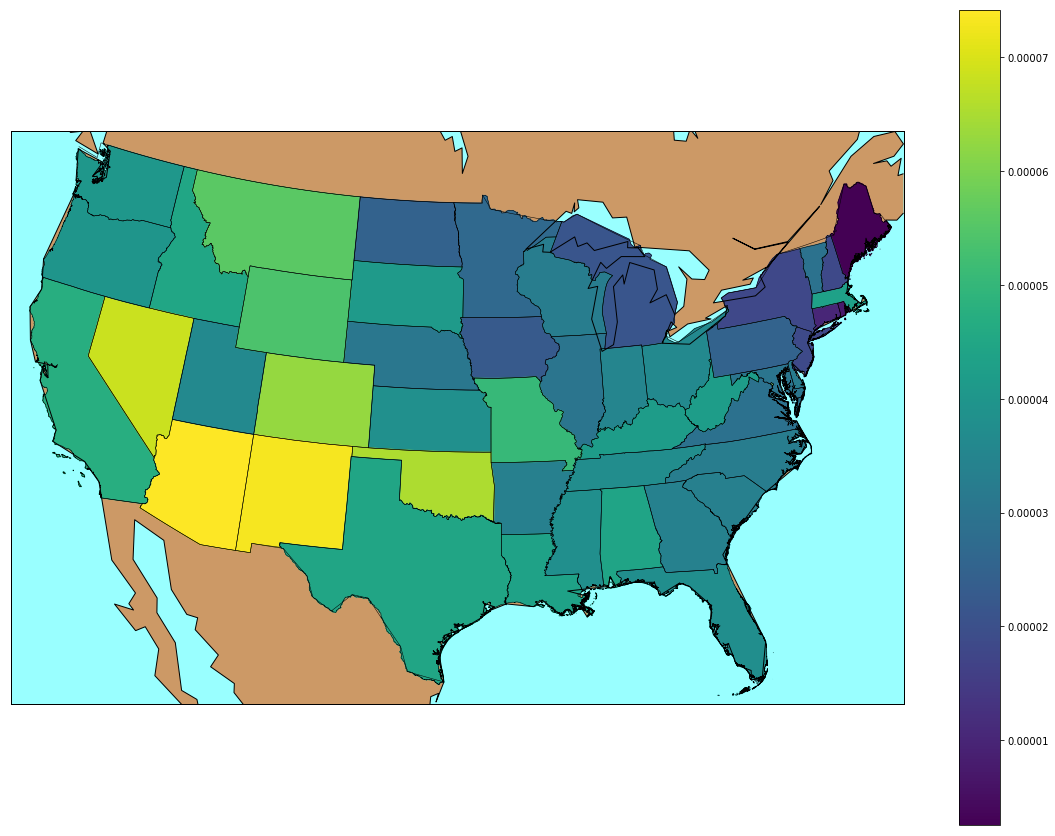

In [226]:
from matplotlib.collections import PatchCollection

mapfile = "C:\\Users\\Sam\\Desktop\\Research - Crow White\\data\\USA_adm_shp"
colors = {}
ccc = []
statenames = []
indices = {}
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.ax = ax
m.readshapefile(mapfile + '\\USA_adm1', name='states', drawbounds=True)

cmap = plt.cm.viridis
vmin = min(counts.values())
vmax = max(counts.values())
for shapedict in range(len(m.states_info)):
    statename = m.states_info[shapedict]['HASC_1'].split(".")[-1]
    count = counts[statename]
    #if m.states_info[shapedict]["NAME_1"] in colors:
    #    continue
    #else:
        #print(1 - np.sqrt((count - vmin)/(vmax-vmin)))
    colors[m.states_info[shapedict]["NAME_1"]] = cmap(np.sqrt((count - vmin)/(vmax-vmin)))[:3]
    statenames.append(m.states_info[shapedict]["NAME_1"])
    indices[shapedict] = m.states_info[shapedict]["NAME_1"]
    ccc.append(count)
    

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966', lake_color='#99ffff');
patches = []

for nshape, seg in enumerate(m.states):
    
    #if nshape in indices:
    color = rgb2hex(colors[indices[nshape]])
        #print(color)
    poly = Polygon(seg, facecolor = color, edgecolor = color)
    ax.add_patch(poly)
    patches.append(poly)
    

p = PatchCollection(patches, cmap=plt.cm.viridis)
p.set_array(np.array(ccc))
cb = fig.colorbar(p, ax=ax)

#plt.show()
plt.savefig("statedistplot.png")

In [200]:
final["date"] = pd.to_datetime(final["date"])

In [204]:
final["months"] = final['date'].dt.strftime('%B')

In [211]:
mos = """January
February
March
April
May
June
July
August
September
October
November
December""".split("\n")

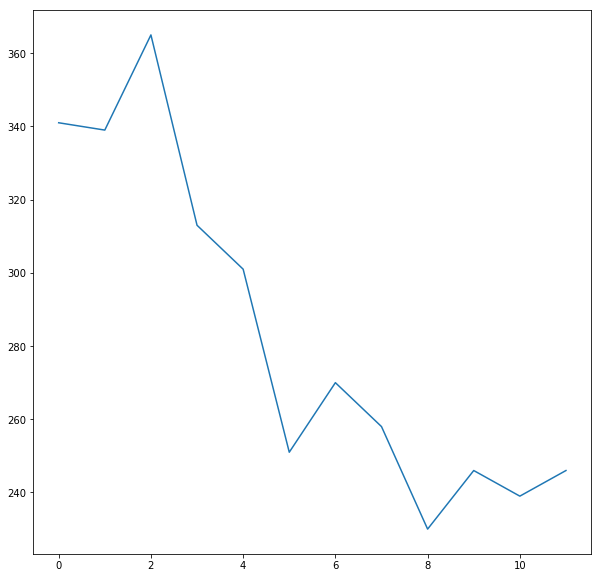

In [215]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(0,12), [lol[x] for x in mos])

In [209]:
lol

Counter({'April': 313,
         'August': 258,
         'December': 246,
         'February': 339,
         'January': 341,
         'July': 270,
         'June': 251,
         'March': 365,
         'May': 301,
         'November': 239,
         'October': 246,
         'September': 230})

In [208]:
lol = Counter(final["months"])

In [198]:
final.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_pop,Ethnicity
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,7073146,0
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,3982267,1
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2898292,2
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,38654206,1
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,5359295,2


In [197]:
final.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_pop,Ethnicity
0,0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,7073146,0
1,1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,3982267,1
2,2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2898292,2
3,3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,38654206,1
4,4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,5359295,2


In [238]:
clean = final[["manner_of_death", "armed", "age", "gender", "race", "signs_of_mental_illness", "threat_level", "flee", "body_camera"]]

In [239]:
clean["signs_of_mental_illness"] = [1 if clean.iloc[x]["signs_of_mental_illness"] == True else 0 for x in range(len(clean))]
clean["body_camera"] = [1 if clean.iloc[x]["body_camera"] == True else 0 for x in range(len(clean))]

C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [400]:
clean = clean.sample(frac = 1)
labels = clean["race"]

In [401]:
dumm = pd.get_dummies(clean[[x for x in clean.columns if x != "race"]])
labels = pd.get_dummies(labels)
alld = dumm.values
alllabels = labels.values
xtrain, ytrain = alld[:int(.8 * len(alld)),], alllabels[:int(.8 * len(alld)),]
xtest, ytest = alld[int(.8 * len(alld)):,], alllabels[int(.8* len(alld)):,]

In [402]:
newx = []
newy = []
for i in range(len(xtrain)):
    if np.argmax(ytrain[i]) != 5:
        newx.append(xtrain[i])
        newx.append(xtrain[i])
        #newx.append(xtrain[i])
        newy.append(ytrain[i])
        #newy.append(ytrain[i])
        newy.append(ytrain[i])
    else:
        newx.append(xtrain[i])
        newy.append(ytrain[i])

In [403]:
xtrain = np.array(newx)
ytrain = np.array(newy)

In [413]:
Counter(clean.race)

Counter({'W': 1606, nan: 289, 'B': 803, 'H': 562, 'O': 32, 'A': 53, 'N': 54})

In [409]:
Counter([np.argmax(x) for x in alllabels])

Counter({0: 342, 1: 803, 2: 562, 3: 54, 4: 32, 5: 1606})

In [405]:
from keras.layers.normalization import BatchNormalization

In [406]:
nn = models.Sequential()
nn.add(layers.Dense(8, input_shape = (input_size,), kernel_regularizer=regularizers.l2(.01), activation = "sigmoid"))
nn.add(layers.Dropout(.2))
nn.add(BatchNormalization())
nn.add(layers.Dense(8, activation = "sigmoid", kernel_regularizer=regularizers.l2(.01)))
#nn.add(layers.Dropout(.2))
#nn.add(layers.Dense(8, activation = "sigmoid"))
#nn.add(layers.Dropout(.2))
nn.add(layers.Dense(6, activation = "softmax"))

nn.compile(
    optimizer="rmsprop",             # Improved backprop algorithm
    loss='categorical_crossentropy', # "Misprediction" measure
    metrics=['accuracy']             # Report CCE value as we train
)

In [407]:
hst = nn.fit(xtrain, ytrain, epochs = 50, batch_size = 64,
 validation_data = (xtest, ytest))

Train on 4173 samples, validate on 680 samples
Epoch 1/50
4173/4173 [==============================] - 2s 587us/step - loss: 1.6338 - acc: 0.2341 - val_loss: 1.4717 - val_acc: 0.4971
Epoch 2/50
4173/4173 [==============================] - 0s 30us/step - loss: 1.4006 - acc: 0.3247 - val_loss: 1.2844 - val_acc: 0.5132
Epoch 3/50
4173/4173 [==============================] - 0s 30us/step - loss: 1.2694 - acc: 0.3393 - val_loss: 1.1988 - val_acc: 0.5044
Epoch 4/50
4173/4173 [==============================] - 0s 29us/step - loss: 1.2061 - acc: 0.3616 - val_loss: 1.1764 - val_acc: 0.4706
Epoch 5/50
4173/4173 [==============================] - 0s 30us/step - loss: 1.1791 - acc: 0.3642 - val_loss: 1.1583 - val_acc: 0.4515
Epoch 6/50
4173/4173 [==============================] - 0s 28us/step - loss: 1.1693 - acc: 0.3688 - val_loss: 1.1470 - val_acc: 0.4676
Epoch 7/50
4173/4173 [==============================] - 0s 33us/step - loss: 1.1622 - acc: 0.3729 - val_loss: 1.1451 - val_acc: 0.4574
Epoch 8

In [410]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 8)                 736       
_________________________________________________________________
dropout_71 (Dropout)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 8)                 32        
_________________________________________________________________
dense_114 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_115 (Dense)            (None, 6)                 54        
Total params: 894
Trainable params: 878
Non-trainable params: 16
_________________________________________________________________


In [408]:
Counter([np.argmax(x) for x in nn.predict(xtest)])

Counter({1: 291, 5: 389})